
# How to Rotate an Ellipsoid

## 2D Ellipticity
Here, we use this quation to calculate ellipticity
$$
e_{1} = \frac{I_{11}-I_{22}}{I_{11}+I_{22}+2\sqrt{\det(I)}} \quad e_{2} = \frac{2I_{11}I_{22}}{I_{11}+I_{22}+2\sqrt{\det(I)}}
$$
Here 'I' represents the 2D moment of inertia tensor ($2\times 2$ matrix) of the ellipsoid. When considering shear, 'inertia' refers to surface brightness, which, in our case, corresponds to mass.

In order to get the right e1 and e2, we should get the right tensor in the coordinate basis parallel to the ra, dec(and los). 

## Tensor in another basis
Under a basis $A = \{\vec{v}_{1}, \vec{v}_{2}, \vec{v}_{3}\}$, we have
$$
\vec{r}=x_{1}\vec{v}_{1} + x_{2} \vec{v}_{2} + x_{3} \vec{v}_{3} = [\begin{matrix}
\vec{v}_{1} & \vec{v}_{2} & \vec{v}_{3}
\end{matrix}] \left[\begin{matrix}
x_{1} \\
x_{2} \\
x_{3}
\end{matrix}\right] = V x
$$
Change our basis to another one $B = \{\vec{u}_{1}, \vec{u}_{2}, \vec{u}_{3}\}$, $\vec{r}$ turns to
$$
\vec{r} = U y
$$
which leads to 
$$
Uy = \vec{r} = Vx \quad\rightarrow\quad y = U^TV x=Rx 
$$
What we care about is how the moment of inertia changes. In the basis A and B, the moment of inertia can be write like a matrix
$$
I_{A} = \sum x x^T=\left[\begin{matrix}
\sum x_{1}x_{1} & \sum x_{1}x_{2} & \sum x_{1}x_{3} \\
\sum x_{2}x_{1} & \sum x_{2}x_{2} & \sum x_{3}x_{3} \\
\sum x_{3}x_{1} & \sum x_{3}x_{2} & \sum x_{3}x_{1} 
\end{matrix}\right] \quad 
I_{B} = \sum y y^T=\left[\begin{matrix}
y_{1}y_{1} & y_{1}y_{2} & y_{1}y_{3} \\
y_{2}y_{1} & y_{2}y_{2} & y_{3}y_{3} \\
y_{3}y_{1} & y_{3}y_{2} & y_{3}y_{1} 
\end{matrix}\right]
$$
where
$$
I_{B} = \sum y y^T=\sum R x x^T R^T= R I_{A} R^T
$$
which is what we want.

If we have the eigenvectors and eigenvalues of $I_{A}$, we can reconstruct $I_{A}$ and then we get $I_{B}$ and its projected ellipticity.

$$
I_{ij}=\frac{1}{W}\sum w_{ij}x_{i}x_{j}=\frac{1}{3} \left[\begin{matrix}
a^{2} & 0 & 0 \\
0 & b^{2} & ~~0~~ \\
0 & 0 & c^{2}
\end{matrix}\right]
$$

## LOS coord
Ref: https://arxiv.org/pdf/2309.08605 Sect.2.3

moments of inertia:
 [[ 14.48204215 -11.93401488]
 [-11.93401488  10.25611969]]
my result:
 [[ 14.7738962  -12.18699594]
 [-12.18699594  10.4761038 ]]


ellipticity(the most basic):
 0.14207578172748817 -0.8057517979190795
ellipticity(through particle's moment of inertia tensor) :
 (0.1423762222295577, -0.8041415658940685)
ellipticity(my result):
 (0.14207578172748822, -0.8057517979190798)


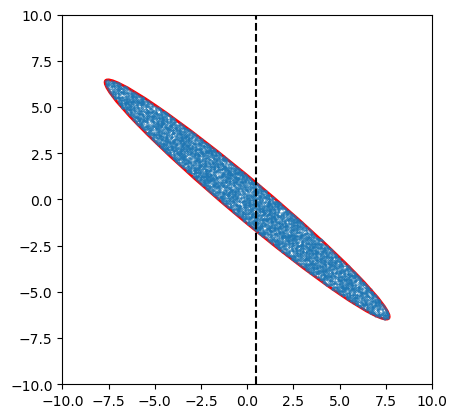

In [1]:
# Tests maybe useful
from rotate import get_inertia_tensor, inertia_tensor_transform, get_ellipticity
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def generate_ellipse_point(a, b, angle, num_points=100):
    '''
    generate points in an ellipse

    a: float
        semi-major axis
    b: float
        semi-minor axis
    angle: float, degree
        angle between the semi-major axis and the x-axis
    num_points: int
        number of points to generate
    '''

    r = np.sqrt(np.random.rand(num_points))
    theta = 2 * np.pi * np.random.rand(num_points)
    x = r * a * np.cos(theta)
    y = r * b * np.sin(theta)

    angle_rad = np.deg2rad(angle)
    x_rotated = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_rotated = x * np.sin(angle_rad) + y * np.cos(angle_rad)

    return x_rotated, y_rotated

# semi-major axis, semi-minor axis, angle between the semi-major axis and the x-axis
a, b, angle = 10, 1, 140 

# generate points in an ellipse
x, y = generate_ellipse_point(a, b, angle, 10000)

# calculate the moment of inertia tensor
A = np.cov(x, y)

# the main axis of the ellipse, also the eigenvectors of the inertia tensor
coordbase1 = np.array([
    [np.cos(np.deg2rad(angle)), -np.sin(np.deg2rad(angle))],
    [np.sin(np.deg2rad(angle)), np.cos(np.deg2rad(angle))],
])

# the coordinate basis parallel to the ra, dec, and los
coordbase2 = np.array([
    [1, 0],
    [0, 1],
])

B = get_inertia_tensor(np.array([a, b]))
C = inertia_tensor_transform(B, coordbase1, coordbase2)
print('moments of inertia:\n', A)
print('my result:\n', C/4)

e1, e2 = (a-b)/(a+b)*np.cos(np.deg2rad(2*angle)), (a-b)/(a+b)*np.sin(np.deg2rad(2*angle))
print('\n')
print('ellipticity(the most basic):\n', e1, e2)
print('ellipticity(through particle\'s moment of inertia tensor) :\n', get_ellipticity(A))
print('ellipticity(my result):\n', get_ellipticity(C))

fig, ax = plt.subplots()
ellipse = patches.Ellipse((0, 0), 2*a, 2*b, angle=angle, edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.scatter(x, y, s=0.1)
lim = max(a, b)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_aspect('equal')
plt.axvline(0.5, c='k', ls='--')
plt.show()

In [71]:
# Campare my rotation with Nick's

from halotools.utils import project_onto_plane, normalized_vectors
from Ptolemy import np
from rotate import get_coordbase_parallel_ra_dec

def project_NCP(lines_of_sight):
    """
    Project the unit vector to the North Celestial Pole (NCP), which is [0,0,1] in 3D cartesian, to the plane perpendicular to the line of sight
    This projection will give the unit vector (after normalization) towards North in the frame of the plane, which will become the vertical basis axis

    Parameters
    ----------
    lines_of_sight : np.ndarray
        an array of shape (npts, 3) conatining npts different lines of sight to npts number of objects.
        This is the vector perpendicular to the plane upon which that object's projection will lie

    Returns
    -------
    projected_ncp : np.ndarray
        An array of shape (npts, 3) containing the normalized projections of the NCP onto the plane of interest

    west : np.ndarray
        An array of shape (npts, 3) containing the axis pointing west. This must point "right" from the NCP
        i.e. making the line of sight our x, and the projected NCP our z, west is our y axis (using the traditional x,y,z coordinate system of x out of the board, y to the right, and z up)
        In this case, the line of sight is going into the board, the projected NCP goes up from the point where it hits the galaxy, then we cross in that order to get west
    """
    ncp = np.array([0,0,1])
    # ncp = np.tile( ncp, len(lines_of_sight) ).reshape( len(lines_of_sight), 3 )

    projected_ncp = project_onto_plane( ncp, lines_of_sight )
    
    # the project ncp is the new vertical axis, get the new horizontal axis
    west = np.cross(lines_of_sight, projected_ncp)

    return normalized_vectors(projected_ncp), normalized_vectors(west)

def ra_dec_to_cartesian(ra, dec, r=1):
    """
    Convert Right Ascension (RA) and Declination (Dec) to Cartesian coordinates.
    
    Parameters:
    - ra (float): Right Ascension in degrees
    - dec (float): Declination in degrees
    - r (float): Radius, default is 1 for unit vector
    
    Returns:
    - (np.ndarray): Cartesian coordinates (x, y, z)
    """
    # Convert angles from degrees to radians
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)

    # Cartesian coordinates
    x = r * np.cos(dec_rad) * np.cos(ra_rad)
    y = r * np.cos(dec_rad) * np.sin(ra_rad)
    z = r * np.sin(dec_rad)

    return np.array([x, y, z]).T

ra_example = 42
dec_example = 50
line_of_sight = ra_dec_to_cartesian(ra_example, dec_example)

coord1 = get_coordbase_parallel_ra_dec(ra_example, dec_example)
x, y = project_NCP(line_of_sight)
coord2 = np.array([x, y, line_of_sight.reshape(1, -1)]).reshape(3, 3).T

print('My Result:\n', coord1)
print('\n Nick\'s result:\n', coord2)

My Result:
 [[ 0.56928196 -0.66913061  0.47768429]
 [ 0.51258378  0.74314483  0.43010886]
 [-0.64278761  0.          0.76604444]]

 Nick's result:
 [[-0.56928196  0.66913061  0.47768429]
 [-0.51258378 -0.74314483  0.43010886]
 [ 0.64278761  0.          0.76604444]]
